In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [67]:
data = pd.read_csv('data_tcns.csv')

In [68]:
data.head()

,Date,Series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,341.00,345.00,337.90,339.45,341.00,342.05,341.08,542,329.0,"1,10,101","3,75,52,934.30","2,848"
1,27-Mar-24,EQ,347.95,349.30,334.35,343.00,337.40,339.45,342.22,542,329.0,"1,90,251","6,51,07,268.75","6,073"
2,26-Mar-24,EQ,336.30,346.95,336.30,341.60,344.00,343.00,340.73,542,329.0,"2,09,882","7,15,13,327.35","5,580"
3,22-Mar-24,EQ,344.35,346.70,340.00,344.35,340.55,341.60,343.57,542,329.0,"47,542","1,63,33,919.65","1,572"
4,21-Mar-24,EQ,345.00,348.50,341.60,342.05,344.00,344.35,345.45,542,329.0,"88,858","3,06,96,103.20","3,494"


In [69]:
data.shape

(62, 14)

In [70]:
print("Columns in DataFrame:", data.columns)

Columns in DataFrame: Index(['Date', 'Series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')


In [91]:
data.describe()

count    61.000000
mean      0.572951
std       8.976616
min     -27.700000
25%      -2.900000
50%       0.950000
75%       4.150000
max      21.500000
Name: close, dtype: float64

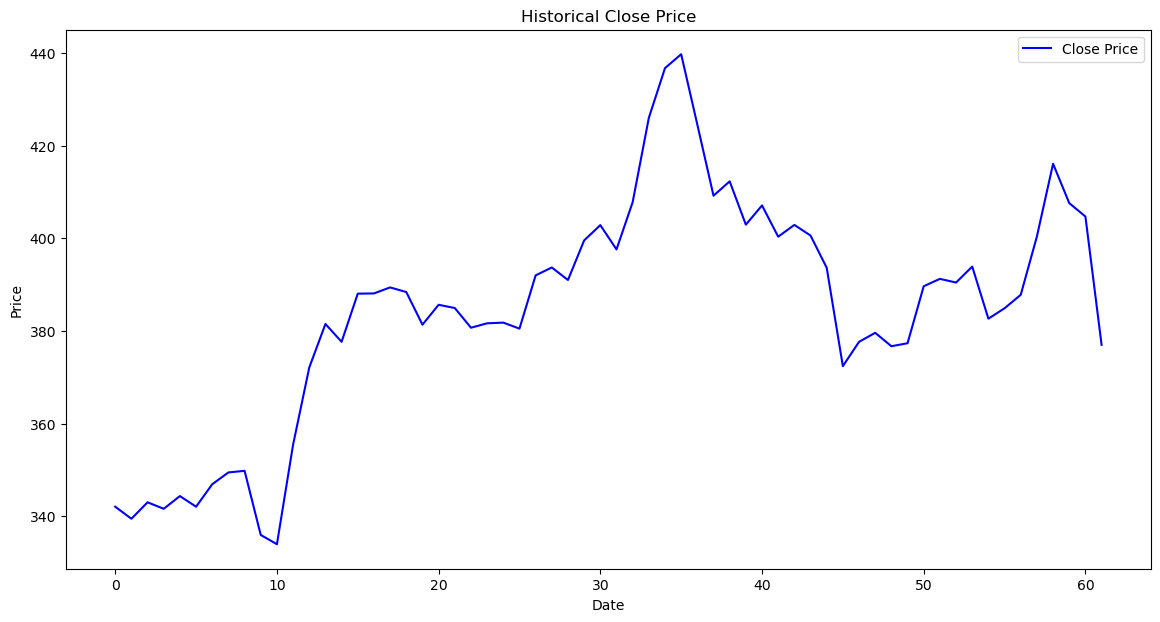

In [72]:
# Plot historical Close price
plt.figure(figsize=(14, 7))
plt.plot(data['close'], color='blue', label='Close Price')
plt.title('Historical Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

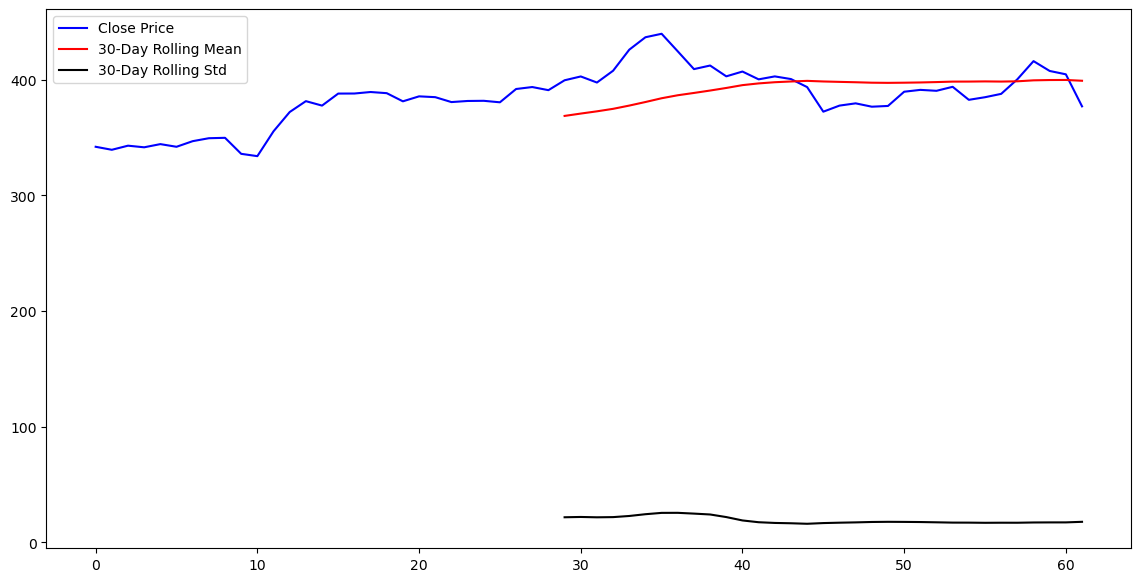

In [73]:
# Calculate and plot rolling mean and rolling standard deviation
data['Rolling_Mean'] = data['close'].rolling(window=30).mean()
data['Rolling_Std'] = data['close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(data['close'], color='blue', label='Close Price')
plt.plot(data['Rolling_Mean'], color='red', label='30-Day Rolling Mean')
plt.plot(data['Rolling_Std'], color='black', label='30-Day Rolling Std')
plt.legend()
plt.show()

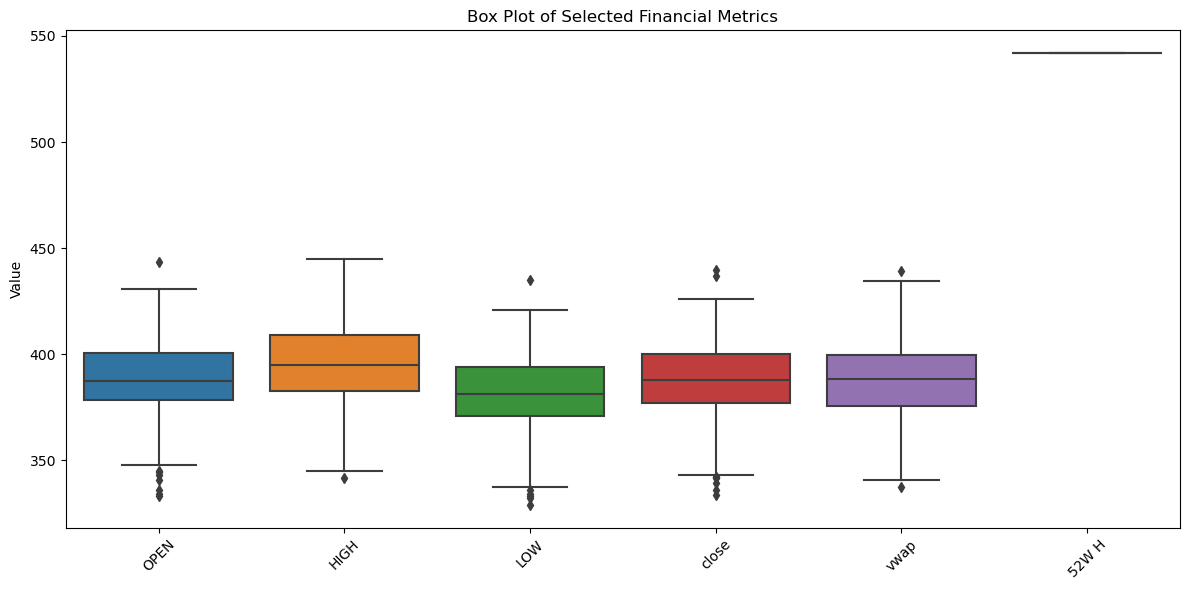

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['OPEN', 'HIGH', 'LOW', 'close', 'vwap', '52W H']])
plt.title('Box Plot of Selected Financial Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

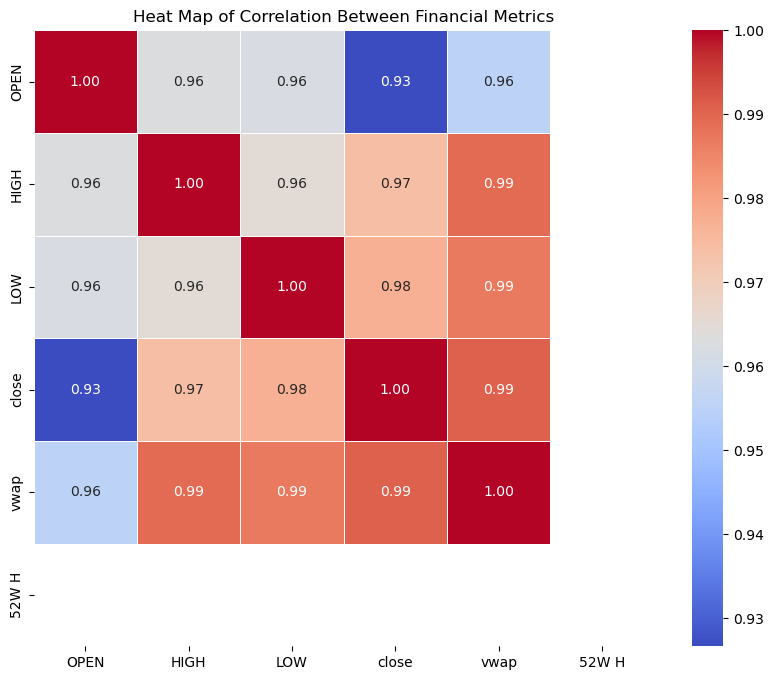

In [76]:
# Calculate the correlation matrix
correlation_matrix = data[['OPEN', 'HIGH', 'LOW', 'close', 'vwap', '52W H']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heat Map of Correlation Between Financial Metrics')
plt.show()

In [79]:
# Calculate error metrics for the ARIMA model
data_test = data['close'][-30:]  # Assuming the last 30 values as test set
predicted = arima_model.predict(start=len(data) - 30, end=len(data) - 1)

# Calculate Mean Absolute Error and Root Mean Squared Error
mae = mean_absolute_error(data_test, predicted)
rmse = np.sqrt(mean_squared_error(data_test, predicted))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 7.740484347929339
Root Mean Squared Error (RMSE): 9.900123220917608


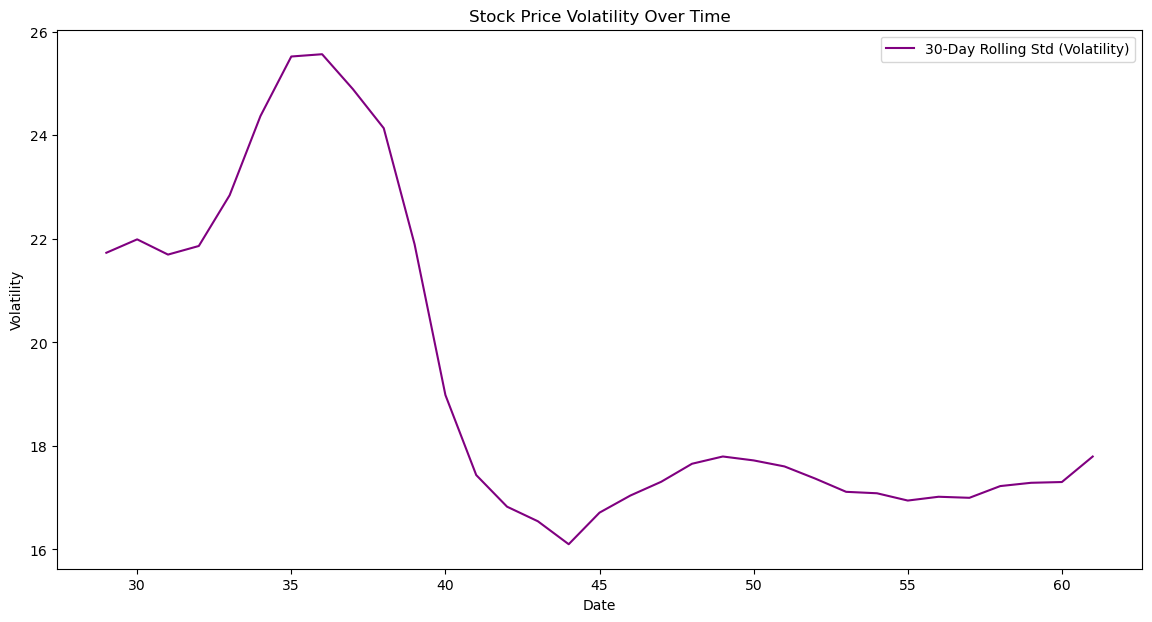

In [80]:
# Plot rolling 30-day standard deviation to analyze volatility
plt.figure(figsize=(14, 7))
data['Rolling_Std'] = data['close'].rolling(window=30).std()
plt.plot(data['Rolling_Std'], color='purple', label='30-Day Rolling Std (Volatility)')
plt.title('Stock Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [43]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')  # ADF test
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

# Check stationarity of the 'Close' column
adf_test(data['Close'])


ADF Statistic: -2.326075035838301
p-value: 0.1636960954079767
Critical Values:
	1%: -3.5443688564814813
	5%: -2.9110731481481484
	10%: -2.5931902777777776
The series is non-stationary.


In [45]:
# Fit the ARIMA model (make sure to use the differenced series if needed)
model = ARIMA(data['Close'], order=(1, 1, 1))  # Adjust (p, d, q) as necessary
arima_model = model.fit()

# Print model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   62
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -218.566
Date:                Sun, 27 Oct 2024   AIC                            443.133
Time:                        15:50:27   BIC                            449.466
Sample:                             0   HQIC                           445.615
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1258      0.563      0.224      0.823      -0.977       1.229
ma.L1          0.1143      0.573      0.199      0.842      -1.010       1.238
sigma2        75.7382     11.942      6.342      0.0

D:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index 

ADF Statistic: -5.477562889550364
p-value: 2.323188135301805e-06
Determined differencing order d: 0


<Figure size 1200x600 with 0 Axes>

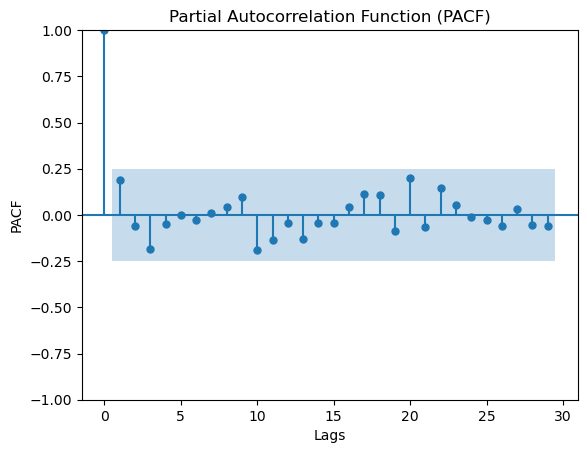

Enter the value for p based on the PACF plot: 12


<Figure size 1200x600 with 0 Axes>

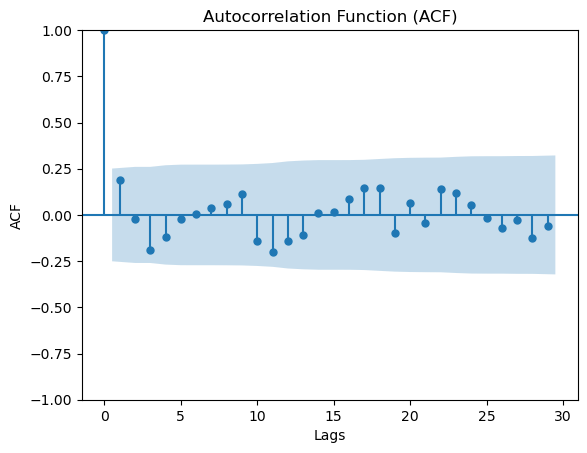

Enter the value for q based on the ACF plot: 15
Determined ARIMA parameters: p=12, d=0, q=15


D:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index 

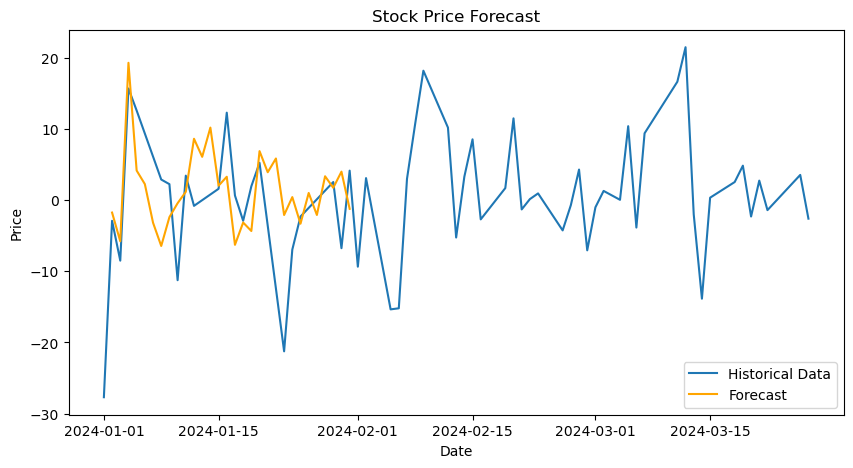

In [92]:
# Check for stationarity and determine d
def test_stationarity(ts):
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1]

p_value = test_stationarity(data)

d = 0  # Initial differencing
while p_value > 0.05:
    data = data.diff().dropna()
    d += 1
    p_value = test_stationarity(data)

print(f'Determined differencing order d: {d}')

# Step 4: Determine p (AR order) using PACF
max_lags = min(len(data) // 2 - 1, 40)  # Set max lags based on the size of the dataset
plt.figure(figsize=(12, 6))
plot_pacf(data, lags=max_lags)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

p = int(input("Enter the value for p based on the PACF plot: "))

# Step 5: Determine q (MA order) using ACF
plt.figure(figsize=(12, 6))
plot_acf(data, lags=max_lags)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

q = int(input("Enter the value for q based on the ACF plot: "))

print(f'Determined ARIMA parameters: p={p}, d={d}, q={q}')

# Fit the ARIMA model
model = ARIMA(data, order=(p, d, q))
model_fit = model.fit()

# Make predictions
forecast_steps = 30  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(data.index[-100:], data[-100:], label='Historical Data')  # Last 100 days of historical data
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps),
         forecast, label='Forecast', color='orange')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [93]:
forecast_steps = 30  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Print forecasted values
print("Forecasted values:")
print(forecast)

Forecasted values:
61    -1.741913
62    -5.776925
63    19.310167
64     4.164468
65     2.259926
66    -3.166217
67    -6.437374
68    -2.384690
69    -0.425569
70     1.182376
71     8.632176
72     6.091792
73    10.203515
74     2.037556
75     3.292232
76    -6.278590
77    -3.142212
78    -4.335634
79     6.896121
80     3.925141
81     5.859706
82    -2.086976
83     0.431445
84    -3.311760
85     1.012663
86    -2.080831
87     3.360805
88     1.743367
89     4.008368
90    -1.219705
Name: predicted_mean, dtype: float64


D:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
